In [1]:
import pandas as pd
import os
import glob

# Review Stock Data

In [4]:
stock_data_dir = 'data/stock'
data_file_list = os.listdir(stock_data_dir)

In [5]:
print(f'No. of files: {len(stock_data_dir)}')

No. of files: 10


In [4]:
count = 0

for data_file in data_file_list:
    df = pd.read_csv(os.path.join(stock_data_dir, data_file))
    count += df.shape[0]
    
del df

print(f'Total number of datapoints: {count}')

Total number of datapoints: 1215318


In [34]:
for ticker in ['TSLA', 'AAPL', 'AMZN', 'JPM']:
    rel_files = glob.glob('data/stock'+f'/{ticker}*.csv')
    tar_file_name = f'combined_{ticker}.csv'
    df = pd.read_csv(rel_files[0])
    for i in range(1, len(rel_files)):
        df_temp = pd.read_csv(rel_files[i])
        df = pd.concat([df_temp, df])
    df.to_csv(os.path.join(stock_data_dir, tar_file_name), index=False, encoding='utf-8-sig')

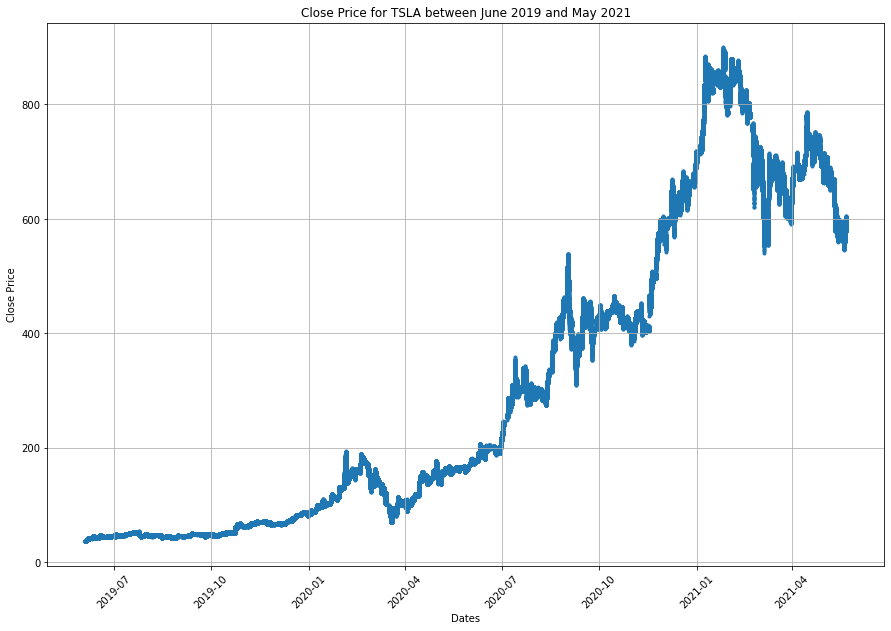

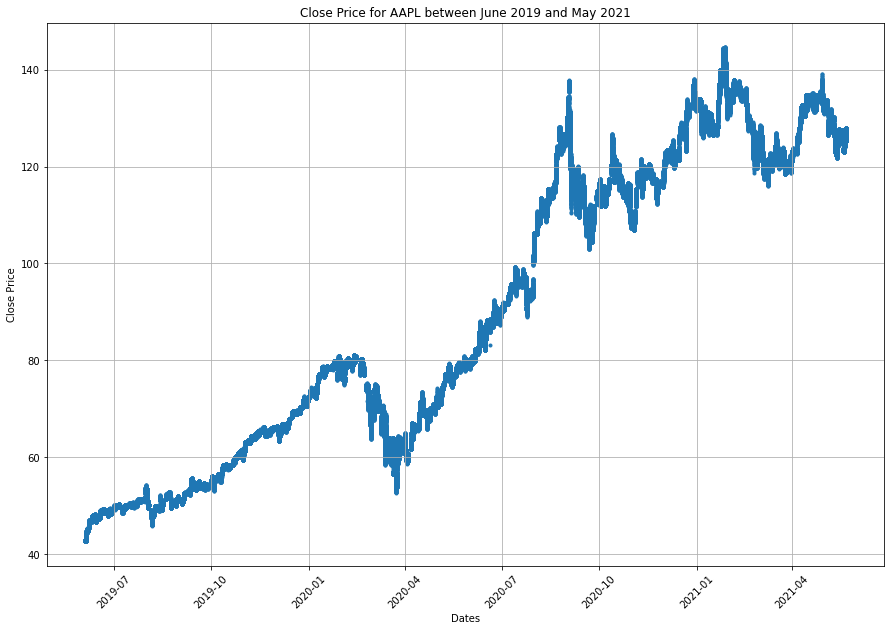

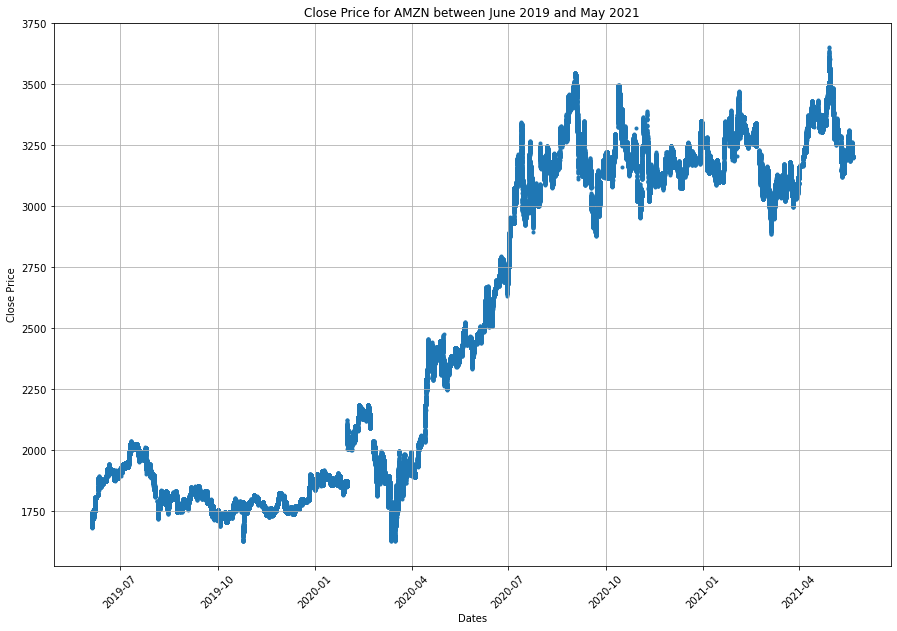

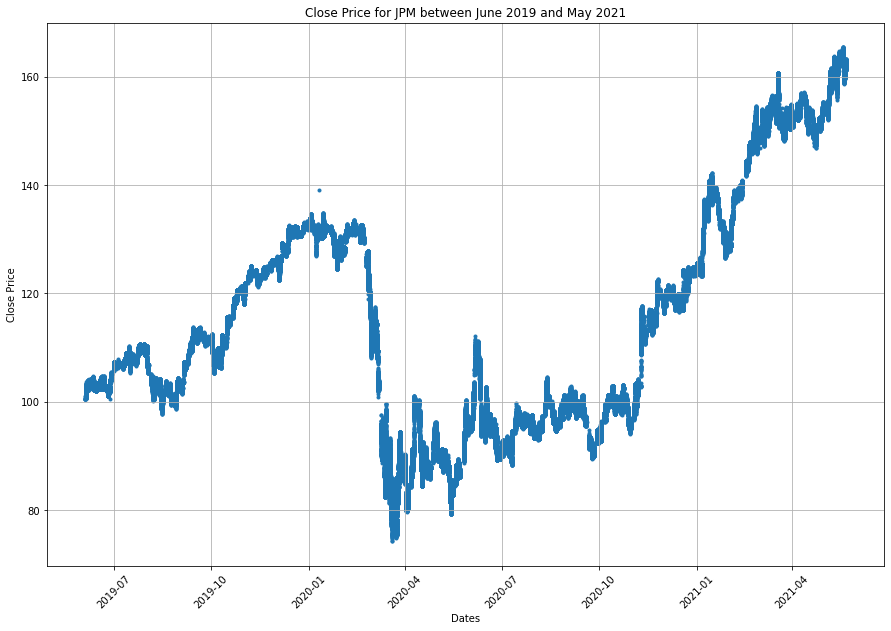

In [61]:
stock_dict = {}

for ticker in ['TSLA', 'AAPL', 'AMZN', 'JPM']:
    stock_dict[ticker] = pd.read_csv(stock_data_dir+ f'/combined_{ticker}.csv')
    stock_dict[ticker]['time'] = pd.to_datetime(stock_dict[ticker]['time'])
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(stock_dict[ticker]['time'], stock_dict[ticker]['close'], marker='.')
    ax.grid()
    plt.xticks(rotation=45)
    plt.xlabel('Dates')
    plt.ylabel('Close Price')
    plt.title(f'Close Price for {ticker} between June 2019 and May 2021')
    plt.savefig(f'{ticker}.png')
    plt.show()

In [6]:
stock_dict = {}

for ticker in ['TSLA', 'AAPL', 'AMZN', 'JPM']:
    stock_dict[ticker] = pd.read_csv(stock_data_dir+ f'/combined_{ticker}.csv')
    stock_dict[ticker]['time'] = pd.to_datetime(stock_dict[ticker]['time'])

In [8]:
stock_dict['TSLA'].describe()

,open,high,low,close,volume
count,344077.000000,344077.000000,344077.000000,344077.000000,3.440770e+05
mean,334.623894,334.896233,334.353429,334.622115,8.219974e+04
std,264.341877,264.527062,264.158156,264.340302,1.403663e+05
min,35.980000,36.036000,35.922000,36.024000,0.000000e+00
25%,90.200000,90.296000,90.059240,90.200000,4.135000e+03
50%,276.600000,276.870000,276.254000,276.600000,3.513500e+04
75%,589.000000,589.630300,588.250000,588.985300,1.051500e+05
max,900.000000,900.400000,897.770000,900.000000,7.328225e+06


In [12]:
stock_dict['JPM'].describe()

,open,high,low,close,volume
count,246013.000000,246013.000000,246013.000000,246013.000000,2.460130e+05
mean,113.709217,113.756884,113.661375,113.708983,2.883510e+04
std,21.249489,21.246617,21.252377,21.249692,6.423474e+04
min,74.229486,74.727928,73.721459,74.200730,0.000000e+00
25%,96.647725,96.696636,96.601358,96.648076,7.853000e+03
50%,108.090816,108.128426,108.057749,108.090816,1.797500e+04
75%,129.978284,130.016625,129.930357,129.978284,3.389300e+04
max,165.410000,165.500000,165.350000,165.410000,7.534692e+06


In [9]:
stock_dict['TSLA']

,time,open,high,low,close,volume
0,2019-07-05 04:05:00,47.074,47.074,47.074,47.074,960
1,2019-07-05 04:13:00,47.084,47.084,47.084,47.084,555
2,2019-07-05 04:28:00,47.072,47.072,47.072,47.072,2465
3,2019-07-05 04:32:00,47.120,47.120,47.120,47.120,855
4,2019-07-05 04:33:00,47.120,47.120,47.120,47.120,1850
...,...,...,...,...,...,...
344072,2021-03-24 19:56:00,633.700,633.700,633.520,633.700,2260
344073,2021-03-24 19:57:00,633.890,633.890,633.520,633.890,3124
344074,2021-03-24 19:58:00,633.530,633.690,633.500,633.500,3585
344075,2021-03-24 19:59:00,633.700,633.980,633.700,633.980,2576


# Quick Review Alt Data

In [2]:
news_data_mother_dir = 'twitter'
news_data_child_dirs = os.listdir(news_data_mother_dir)
news_data_child_dirs

['wsjbusiness_combined.csv',
 'cnbc',
 'wsjbusiness',
 'theeconomist_combined.csv',
 'bloombergmarkets_combined.csv',
 'reutersbusiness_combined.csv',
 'ftmarkets',
 'theeconomist',
 'cnbc_combined.csv',
 'bloombergmarkets',
 'ftmarkets_combined.csv',
 'bbcbusiness_combined.csv',
 'bbcbusiness',
 'reutersbusiness']

## Test Example

In [5]:
tar_news_data_dir = os.listdir(os.path.join(news_data_mother_dir, news_data_child_dirs[0]))

In [6]:
df1 = pd.read_csv(os.path.join(news_data_mother_dir, news_data_child_dirs[0],tar_news_data_dir[0]))
df2 = pd.read_csv(os.path.join(news_data_mother_dir, news_data_child_dirs[0],tar_news_data_dir[1]))

In [7]:
df1.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/CNBC/status/11849791514778...,2019-10-17 23:47:00+00:00,What do you do with the first 60 seconds of yo...,What do you do with the first 60 seconds of yo...,1184979151477805056,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2IXSD9K'],['https://t.co/XmX8tvmrjy'],0,3,...,0,1184979151477805056,en,"<a href=""https://studio.twitter.com"" rel=""nofo...",https://studio.twitter.com,Twitter Media Studio,[{'thumbnailUrl': 'https://pbs.twimg.com/media...,NaN,NaN,NaN
1,https://twitter.com/CNBC/status/11849771332670...,2019-10-17 23:38:59+00:00,Australia shares down in early trade; China's ...,Australia shares down in early trade; China's ...,1184977133267050497,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2MPh4XZ'],['https://t.co/ln03bNt6gA'],3,6,...,0,1184977133267050497,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
2,https://twitter.com/CNBC/status/11849761956093...,2019-10-17 23:35:15+00:00,"Everything Jim Cramer said on 'Mad Money,' inc...","Everything Jim Cramer said on 'Mad Money,' inc...",1184976195609382914,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2MnC0WU'],['https://t.co/y5Bv4K18cI'],5,2,...,0,1184976195609382914,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
3,https://twitter.com/CNBC/status/11849726238155...,2019-10-17 23:21:03+00:00,"If you’re looking to get engaged, take heart: ...","If you’re looking to get engaged, take heart: ...",1184972623815593985,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2Mm5Vim'],['https://t.co/sogE93bGIe'],4,1,...,1,1184972623815593985,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
4,https://twitter.com/CNBC/status/11849710983932...,2019-10-17 23:15:00+00:00,“The markets are predicting another Fed rate c...,“The markets are predicting another Fed rate c...,1184971098393202688,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/32ou5OR'],['https://t.co/io3n6Ta9LR'],1,10,...,0,1184971098393202688,en,"<a href=""https://studio.twitter.com"" rel=""nofo...",https://studio.twitter.com,Twitter Media Studio,[{'thumbnailUrl': 'https://pbs.twimg.com/media...,NaN,NaN,NaN


In [6]:
df2.head()

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/CNBC/status/11650500839575...,2019-08-23 23:56:00+00:00,"""Everybody is agonizing in this city,"" Henny S...","""Everybody is agonizing in this city,"" Henny S...",1165050083957559296,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/31XrJpj'],['https://t.co/zkFLZHwDeG'],4,8,...,1,1165050083957559296,en,"<a href=""https://studio.twitter.com"" rel=""nofo...",https://studio.twitter.com,Twitter Media Studio,[{'thumbnailUrl': 'https://pbs.twimg.com/media...,NaN,NaN,NaN
1,https://twitter.com/CNBC/status/11650460573504...,2019-08-23 23:40:00+00:00,Innovation and rapid growth in the baby formul...,Innovation and rapid growth in the baby formul...,1165046057350438912,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2KpZOaE'],['https://t.co/1i1itqjJdY'],3,1,...,1,1165046057350438912,en,"<a href=""https://studio.twitter.com"" rel=""nofo...",https://studio.twitter.com,Twitter Media Studio,[{'thumbnailUrl': 'https://pbs.twimg.com/media...,NaN,NaN,NaN
2,https://twitter.com/CNBC/status/11650413576789...,2019-08-23 23:21:19+00:00,Japan coastguard says it detected North Korean...,Japan coastguard says it detected North Korean...,1165041357678960640,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2zezpaC'],['https://t.co/nF4sFCNjTW'],6,15,...,2,1165041357678960640,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
3,https://twitter.com/CNBC/status/11650404890343...,2019-08-23 23:17:52+00:00,"'There's more room to fall' in this market, Wh...","'There's more room to fall' in this market, Wh...",1165040489034387462,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/320ZBls'],['https://t.co/Kt8SlmXZVW'],4,16,...,4,1165040489034387462,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
4,https://twitter.com/CNBC/status/11650387591774...,2019-08-23 23:11:00+00:00,"Fit with an Xbox gaming room, the latest HoloL...","Fit with an Xbox gaming room, the latest HoloL...",1165038759177404416,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",[],[],1,4,...,0,1165038759177404416,en,"<a href=""https://studio.twitter.com"" rel=""nofo...",https://studio.twitter.com,Twitter Media Studio,[{'thumbnailUrl': 'https://pbs.twimg.com/media...,NaN,NaN,"[{'username': 'CNBCi', 'displayname': 'CNBC In..."


In [7]:
pd.concat([df1,df2])

,url,date,content,renderedContent,id,user,outlinks,tcooutlinks,replyCount,retweetCount,...,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,quotedTweet,mentionedUsers
0,https://twitter.com/CNBC/status/11849791514778...,2019-10-17 23:47:00+00:00,What do you do with the first 60 seconds of yo...,What do you do with the first 60 seconds of yo...,1184979151477805056,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2IXSD9K'],['https://t.co/XmX8tvmrjy'],0,3,...,0,1184979151477805056,en,"<a href=""https://studio.twitter.com"" rel=""nofo...",https://studio.twitter.com,Twitter Media Studio,[{'thumbnailUrl': 'https://pbs.twimg.com/media...,NaN,NaN,NaN
1,https://twitter.com/CNBC/status/11849771332670...,2019-10-17 23:38:59+00:00,Australia shares down in early trade; China's ...,Australia shares down in early trade; China's ...,1184977133267050497,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2MPh4XZ'],['https://t.co/ln03bNt6gA'],3,6,...,0,1184977133267050497,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
2,https://twitter.com/CNBC/status/11849761956093...,2019-10-17 23:35:15+00:00,"Everything Jim Cramer said on 'Mad Money,' inc...","Everything Jim Cramer said on 'Mad Money,' inc...",1184976195609382914,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2MnC0WU'],['https://t.co/y5Bv4K18cI'],5,2,...,0,1184976195609382914,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
3,https://twitter.com/CNBC/status/11849726238155...,2019-10-17 23:21:03+00:00,"If you’re looking to get engaged, take heart: ...","If you’re looking to get engaged, take heart: ...",1184972623815593985,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2Mm5Vim'],['https://t.co/sogE93bGIe'],4,1,...,1,1184972623815593985,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
4,https://twitter.com/CNBC/status/11849710983932...,2019-10-17 23:15:00+00:00,“The markets are predicting another Fed rate c...,“The markets are predicting another Fed rate c...,1184971098393202688,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/32ou5OR'],['https://t.co/io3n6Ta9LR'],1,10,...,0,1184971098393202688,en,"<a href=""https://studio.twitter.com"" rel=""nofo...",https://studio.twitter.com,Twitter Media Studio,[{'thumbnailUrl': 'https://pbs.twimg.com/media...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,https://twitter.com/CNBC/status/11646923209834...,2019-08-23 00:14:22+00:00,Cramer Remix: I'd be a buyer of VMware on weak...,Cramer Remix: I'd be a buyer of VMware on weak...,1164692320983408640,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2zihbot'],['https://t.co/16pmKEFYM0'],3,2,...,1,1164692320983408640,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
165,https://twitter.com/CNBC/status/11646916044243...,2019-08-23 00:11:32+00:00,Texas ransomware attacks show big gaps in cybe...,Texas ransomware attacks show big gaps in cybe...,1164691604424318977,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/2zfhvnZ'],['https://t.co/RG7uX9Es2W'],1,5,...,1,1164691604424318977,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
166,https://twitter.com/CNBC/status/11646913098122...,2019-08-23 00:10:21+00:00,Top White House economic advisor Larry Kudlow ...,Top White House economic advisor Larry Kudlow ...,1164691309812211714,"{'username': 'CNBC', 'displayname': 'CNBC', 'i...",['https://cnb.cx/31Undbe'],['https://t.co/hHHZWmPg99'],7,6,...,3,1164691309812211714,en,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://www.socialflow.com,SocialFlow,NaN,NaN,NaN,NaN
167,https://twit

In [8]:
for tw_acc in news_data_child_dirs:
    print(f'start working with {tw_acc}')
    file_list = os.listdir(os.path.join(news_data_mother_dir, tw_acc))
    file_len = len(file_list)
    ind = 0
    for i in range(len(file_list)):
        try:
            df = pd.read_csv(os.path.join(news_data_mother_dir, tw_acc, file_list[i]))
            ind = i
            break
        except:
            pass
    
    for i in range(ind, len(file_list)):
        try:
            df_temp = pd.read_csv(os.path.join(news_data_mother_dir, tw_acc, file_list[i]))
            df = pd.concat([df_temp, df])
        except:
            pass
        
    combined_file_name = f"{tw_acc}_combined.csv"
    print(f'saving file {combined_file_name} -> {news_data_mother_dir}')
    df.to_csv(os.path.join(news_data_mother_dir, combined_file_name), index=False, encoding='utf-8-sig')
    print(f'finished ')

start working with cnbc
saving file cnbc_combined.csv -> twitter
finished 
start working with wsjbusiness
saving file wsjbusiness_combined.csv -> twitter
finished 
start working with ftmarkets
saving file ftmarkets_combined.csv -> twitter
finished 
start working with theeconomist
saving file theeconomist_combined.csv -> twitter
finished 
start working with bloombergmarkets
saving file bloombergmarkets_combined.csv -> twitter
finished 
start working with bbcbusiness
saving file bbcbusiness_combined.csv -> twitter
finished 
start working with reutersbusiness
saving file reutersbusiness_combined.csv -> twitter
finished 


In [4]:
# create a version that combined all data
file_list = glob.glob('twitter/'+'*.csv')

df = pd.read_csv(file_list[0])

for file in file_list[1:]:
    df_temp = pd.read_csv(file)
    df = pd.concat([df_temp, df])
    
df.to_csv(os.path.join(news_data_mother_dir, 'all_combined_news.csv'), index=False, encoding='utf-8-sig')

/home/see/anaconda3/envs/env_torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/see/anaconda3/envs/env_torch/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
df = pd.read_csv('data/twitter/all_combined_news.csv')

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
df.shape

(368959, 21)

In [13]:
import matplotlib.pyplot as plt

In [14]:
df['date'].sort_values()

192053   2019-01-01 00:00:02+00:00
192052   2019-01-01 00:09:24+00:00
75781    2019-01-01 00:11:51+00:00
192051   2019-01-01 00:20:00+00:00
192050   2019-01-01 00:22:15+00:00
                    ...           
34546    2021-05-20 23:43:00+00:00
194992   2021-05-20 23:50:00+00:00
297080   2021-05-20 23:52:17+00:00
269168   2021-05-20 23:54:06+00:00
34545    2021-05-20 23:58:14+00:00
Name: date, Length: 368959, dtype: datetime64[ns, UTC]

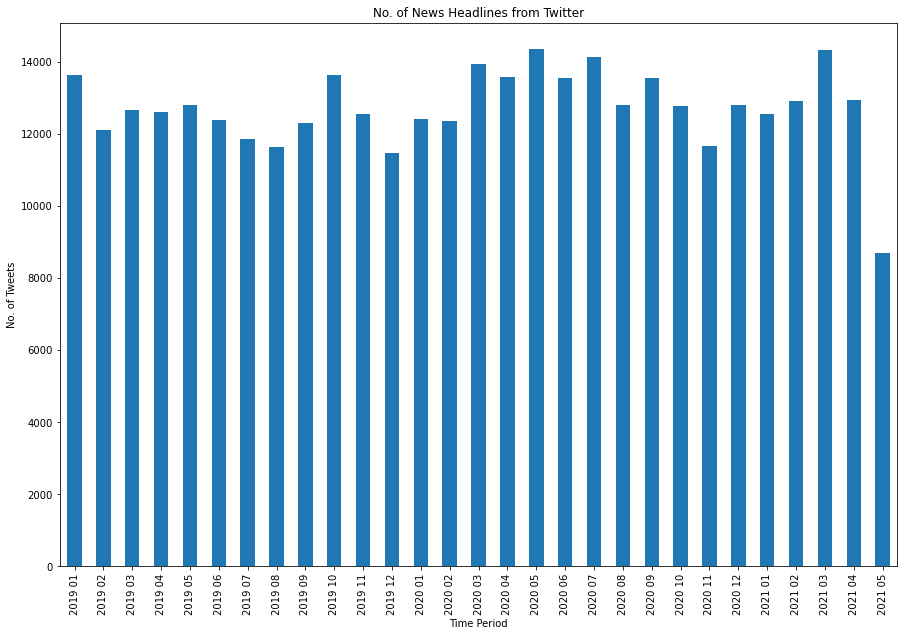

In [17]:
df.groupby(df['date'].dt.strftime('%Y %m')).count().sort_index()['url'].plot(kind='bar', figsize=(15,10))
plt.ylabel('No. of Tweets')
plt.xlabel('Time Period')
plt.title('No. of News Headlines from Twitter')
plt.savefig('barchart.png')

## Prepare very simple data for

In [4]:
datapath = 'data/stock/combined_AAPL.csv'

In [5]:
df = pd.read_csv(datapath)

In [6]:
df

,time,open,high,low,close,volume
0,2020-05-29 04:01:00,78.987137,78.987137,78.987137,78.987137,2120
1,2020-05-29 04:04:00,78.781034,78.781034,78.781034,78.781034,3116
2,2020-05-29 04:05:00,78.783517,78.786000,78.783517,78.786000,1824
3,2020-05-29 04:06:00,78.805866,78.805866,78.805866,78.805866,1860
4,2020-05-29 04:07:00,78.820765,78.820765,78.820765,78.820765,1980
...,...,...,...,...,...,...
382211,2019-08-02 19:53:00,50.159025,50.159025,50.159025,50.159025,1120
382212,2019-08-02 19:56:00,50.183564,50.183564,50.183564,50.183564,8020
382213,2019-08-02 19:57:00,50.171294,50.183564,50.171294,50.183564,2916
382214,2019-08-02 19:58:00,50.183564,50.183564,50.183564,50.183564,5456


In [38]:
df_raw = df.copy()

In [39]:
df['date'] = df['time']

In [40]:
df['time'] = pd.to_datetime(df['time'])

In [56]:
df = df.sort_values('time')

In [58]:
df

,time,open,high,low,close,volume,date,time2
102625,2019-06-04 04:02:00,42.772593,42.772593,42.772593,42.772593,400,20190604,040200
102626,2019-06-04 04:03:00,42.772593,42.772593,42.772593,42.772593,3600,20190604,040300
102627,2019-06-04 04:05:00,42.752961,42.760323,42.738237,42.738237,2728,20190604,040500
102628,2019-06-04 04:06:00,42.738237,42.738237,42.723514,42.723514,2400,20190604,040600
102629,2019-06-04 04:07:00,42.740691,42.740691,42.740691,42.740691,3200,20190604,040700
...,...,...,...,...,...,...,...,...
350677,2021-05-21 19:56:00,125.310000,125.340000,125.310000,125.320000,1422,20210521,195600
350678,2021-05-21 19:57:00,125.310000,125.320000,125.300000,125.320000,2506,20210521,195700
350679,2021-05-21 19:58:00,125.299900,125.320000,125.280000,125.320000,3414,20210521,195800
350680,2021-05-21 19:59:00,125.320000,125.320000,125.300000,125.300000,1284,20210521,195900


In [59]:
df['date'] = df['time'].dt.strftime('%Y%m%d')

In [60]:
df['time2'] = df['time'].dt.strftime('%H%M%S')

In [61]:
target_df = df.copy()

In [62]:
del target_df['time']

In [63]:
target_df = target_df[['date', 'time2', 'open', 'high', 'low', 'close', 'volume']]

In [64]:
# <DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
target_df

,date,time2,open,high,low,close,volume
102625,20190604,040200,42.772593,42.772593,42.772593,42.772593,400
102626,20190604,040300,42.772593,42.772593,42.772593,42.772593,3600
102627,20190604,040500,42.752961,42.760323,42.738237,42.738237,2728
102628,20190604,040600,42.738237,42.738237,42.723514,42.723514,2400
102629,20190604,040700,42.740691,42.740691,42.740691,42.740691,3200
...,...,...,...,...,...,...,...
350677,20210521,195600,125.310000,125.340000,125.310000,125.320000,1422
350678,20210521,195700,125.310000,125.320000,125.300000,125.320000,2506
350679,20210521,195800,125.299900,125.320000,125.280000,125.320000,3414
350680,20210521,195900,125.320000,125.320000,125.300000,125.300000,1284


In [65]:
target_df['time2'] = target_df['time2'].apply(lambda x :str(x))

In [66]:
cols = ['date', 'time', 'open', 'high', 'low', 'close', 'volume']
tar_cols = [f'<{c.upper()}>' for c in cols]
tar_cols

['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOLUME>']

In [67]:
tar_cols[-1] = '<VOL>'

In [68]:
tar_cols

['<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']

In [69]:
target_df.columns = tar_cols

In [70]:
target_df.to_csv('data/stock/processed_AAPL.csv', index=False)

In [71]:
pd.read_csv('data/stock/processed_AAPL.csv')

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,20190604,40200,42.772593,42.772593,42.772593,42.772593,400
1,20190604,40300,42.772593,42.772593,42.772593,42.772593,3600
2,20190604,40500,42.752961,42.760323,42.738237,42.738237,2728
3,20190604,40600,42.738237,42.738237,42.723514,42.723514,2400
4,20190604,40700,42.740691,42.740691,42.740691,42.740691,3200
...,...,...,...,...,...,...,...
382211,20210521,195600,125.310000,125.340000,125.310000,125.320000,1422
382212,20210521,195700,125.310000,125.320000,125.300000,125.320000,2506
382213,20210521,195800,125.299900,125.320000,125.280000,125.320000,3414
382214,20210521,195900,125.320000,125.320000,125.300000,125.300000,1284


In [72]:
target_df

,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
102625,20190604,040200,42.772593,42.772593,42.772593,42.772593,400
102626,20190604,040300,42.772593,42.772593,42.772593,42.772593,3600
102627,20190604,040500,42.752961,42.760323,42.738237,42.738237,2728
102628,20190604,040600,42.738237,42.738237,42.723514,42.723514,2400
102629,20190604,040700,42.740691,42.740691,42.740691,42.740691,3200
...,...,...,...,...,...,...,...
350677,20210521,195600,125.310000,125.340000,125.310000,125.320000,1422
350678,20210521,195700,125.310000,125.320000,125.300000,125.320000,2506
350679,20210521,195800,125.299900,125.320000,125.280000,125.320000,3414
350680,20210521,195900,125.320000,125.320000,125.300000,125.300000,1284


In [83]:
val_ind = int(target_df.shape[0]* 0.5)
test_ind = int(target_df.shape[0]* 0.7)

In [84]:
train = target_df.iloc[:val_ind]
val = target_df.iloc[val_ind:test_ind]
test = target_df.iloc[test_ind:]

In [85]:
train.to_csv('data/stock/train_aapl.csv', index=False)
val.to_csv('data/stock/val_aapl.csv', index=False)

In [86]:
test.to_csv('data/stock/test_aapl.csv', index=False)